In [150]:
# pandas libraries
import pandas as pd
from pandas import DataFrame
from pandas.testing import assert_frame_equal
import IPython.display as ipd
import missingno as mso
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from tslearn.clustering import TimeSeriesKMeans
from tslearn.generators import random_walks
#plt.rcParams['figure.figsize'] = (17, 5)


In [132]:
eco = pd.read_csv(r'C:\Users\jigok\OneDrive\Desktop\UniPISA\2semestre1Anno\DataMining2\Progetto\Data\fma_metadata\echonest.csv',index_col=0, header=[0, 1, 2])


In [133]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 2 to 124911
Columns: 249 entries, ('echonest', 'audio_features', 'acousticness') to ('echonest', 'temporal_features', '223')
dtypes: float64(244), object(5)
memory usage: 25.0+ MB


In [134]:
eco.describe()

echonest                                               \
      audio_features                                                
        acousticness  danceability        energy instrumentalness   
count   1.312900e+04  13129.000000  13129.000000     13129.000000   
mean    5.246876e-01      0.487290      0.537516         0.640536   
std     3.837186e-01      0.190148      0.278049         0.361430   
min     9.035000e-07      0.051307      0.000020         0.000000   
25%     1.037726e-01      0.344759      0.321300         0.323466   
50%     5.739848e-01      0.485635      0.549113         0.838134   
75%     9.207270e-01      0.629094      0.776254         0.918244   
max     9.957965e-01      0.968645      0.999964         0.998016   

                                                                               \
                                                                     metadata   
           liveness   speechiness         tempo       valence artist_latitude   
count  13129.000000  13129.000000  13129.000000  13129.000000     9770.000000   
mean       0.187804      0.099174    123.080061      0.439761       39.961892   
std        0.158051      0.137381     35.015137      0.276028       15.554275   
min        0.025297      0.022324     12.753000      0.000010      -45.867100   
25%        0.101406      0.036932     95.967000      0.197321       37.784827   
50%        0.119002      0.049019    120.057000      0.417743       40.781400   
75%        0.211041      0.085452    145.318000      0.665575       47.254575   
max        0.980330      0.966177    251.072000      0.999990       68.927500   

                        ...                                                \
                        ... temporal_features                               
      artist_longitude  ...               214           215           216   
count      9770.000000  ...      13129.000000  13129.000000  13129.000000   
mean        -49.984040  ...         -1.966002     10.745951      0.308984   
std          59.377974  ...          1.708499     20.053146      0.140164   
min        -155.434000  ...        -17.966162     -1.867880      0.129023   
25%         -87.632400  ...         -2.587326      1.229409      0.242371   
50%         -74.007100  ...         -1.565120      4.355214      0.286014   
75%          -0.127140  ...         -0.875471     11.407599      0.339086   
max         174.770000  ...          1.663782    423.621094      5.211423   

                                                                             \
                                                                              
                217           218           219           220           221   
count  13129.000000  13129.000000  13129.000000  13129.000000  13129.000000   
mean       0.255381      0.163876      0.068526      4.183428      4.114902   
std        0.083731      3.484144      0.010930      4.967481      4.967004   
min        0.098280      0.000518      0.060000      0.322180      0.224580   
25%        0.208750      0.021321      0.063080      1.817050      1.749660   
50%        0.242745      0.042146      0.064490      3.094060      3.026260   
75%        0.285305      0.087516      0.070070      5.147530      5.079770   
max        1.680570    375.744781      0.342000    226.326767    226.244080   

                                   
                                   
                222           223  
count  13129.000000  13129.000000  
mean       7.605432    138.932366  
std        6.444884    225.584951  
min       -3.566834     -1.687834  
25%        2.866906     15.565598  
50%        5.502340     55.874954  
75%       10.597994    175.938553  
max       67.041878   4790.696777  

[8 rows x 244 columns]

In [135]:
eco.head(10)

echonest                                                    \
         audio_features                                                     
           acousticness danceability    energy instrumentalness  liveness   
track_id                                                                    
2              0.416675     0.675894  0.634476         0.010628  0.177647   
3              0.374408     0.528643  0.817461         0.001851  0.105880   
5              0.043567     0.745566  0.701470         0.000697  0.373143   
10             0.951670     0.658179  0.924525         0.965427  0.115474   
134            0.452217     0.513238  0.560410         0.019443  0.096567   
139            0.106550     0.260911  0.607067         0.835087  0.223676   
140            0.376312     0.734079  0.265685         0.669581  0.085995   
141            0.963657     0.435933  0.075632         0.345493  0.105686   
142            0.662881     0.379065  0.823856         0.910266  0.088705   
144            0.909011     0.443643  0.641997         0.924092  0.267669   

                                                                        ...  \
                                           metadata                     ...   
         speechiness    tempo   valence  album_date         album_name  ...   
track_id                                                                ...   
2           0.159310  165.922  0.576661         NaN                NaN  ...   
3           0.461818  126.957  0.269240         NaN                NaN  ...   
5           0.124595  100.260  0.621661         NaN                NaN  ...   
10          0.032985  111.562  0.963590  2008-03-11  Constant Hitmaker  ...   
134         0.525519  114.290  0.894072         NaN                NaN  ...   
139         0.030569  196.961  0.160267         NaN                NaN  ...   
140         0.039068  107.952  0.609991         NaN                NaN  ...   
141         0.026658   33.477  0.163950         NaN                NaN  ...   
142         0.079090  147.781  0.092868        2005     The Quiet Room  ...   
144         0.089659  128.537  0.788251         NaN                NaN  ...   

                                                                              \
         temporal_features                                                     
                       214        215       216       217       218      219   
track_id                                                                       
2                -1.992303   6.805694  0.233070  0.192880  0.027455  0.06408   
3                -1.582331   8.889308  0.258464  0.220905  0.081368  0.06413   
5                -2.288358  11.527109  0.256821  0.237820  0.060122  0.06014   
10               -3.662988  21.508228  0.283352  0.267070  0.125704  0.08082   
134              -1.452696   2.356398  0.234686  0.199550  0.149332  0.06440   
139              -3.078667  12.411567  0.270802  0.272700  0.025242  0.06404   
140              -0.934696  -0.260981  0.322232  0.277980  0.136747  0.07533   
141              -0.457298  -0.165962  0.437503  0.307390  0.368764  0.06263   
142              -1.125605   1.478418  0.215844  0.209660  0.015754  0.06921   
144              -3.454056  16.247305  0.245023  0.226080  0.033509  0.07066   

                                                     
                                                     
               220       221        222         223  
track_id                                             
2          3.67696   3.61288  13.316690  262.929749  
3          6.08277   6.01864  16.673548  325.581085  
5          5.92649   5.86635  16.013849  356.755737  
10         8.41401   8.33319  21.317064  483.403809  
134       11.26707  11.20267  26.454180  751.147705  
139        2.43669   2.37265   3.897095   37.866043  
140        9.86272   9.78739  21.981621  562.229431  
141       11.18884  11.12621  13.481531  232.993546  
142        3.91102   3.84181  12.598523  346.813049  
144   

In [136]:
print('{1} features for {0} tracks'.format(*eco.shape))

ipd.display(eco['echonest', 'temporal_features'].head(10))


249 features for 13129 tracks


,000,001,002,003,004,005,006,007,008,009,...,214,215,216,217,218,219,220,221,222,223
track_id,,,,,,,,,,,,,,,,,,,,,
2,0.877233,0.588911,0.354243,0.295090,0.298413,0.309430,0.304496,0.334579,0.249495,0.259656,...,-1.992303,6.805694,0.233070,0.192880,0.027455,0.06408,3.67696,3.61288,13.316690,262.929749
3,0.534429,0.537414,0.443299,0.390879,0.344573,0.366448,0.419455,0.747766,0.460901,0.392379,...,-1.582331,8.889308,0.258464,0.220905,0.081368,0.06413,6.08277,6.01864,16.673548,325.581085
5,0.548093,0.720192,0.389257,0.344934,0.361300,0.402543,0.434044,0.388137,0.512487,0.525755,...,-2.288358,11.527109,0.256821,0.237820,0.060122,0.06014,5.92649,5.86635,16.013849,356.755737
10,0.311404,0.711402,0.321914,0.500601,0.250963,0.321316,0.734250,0.325188,0.373012,0.235840,...,-3.662988,21.508228,0.283352,0.267070,0.125704,0.08082,8.41401,8.33319,21.317064,483.403809
134,0.610849,0.569169,0.428494,0.345796,0.376920,0.460590,0.401371,0.449900,0.428946,0.446736,...,-1.452696,2.356398,0.234686,0.199550,0.149332,0.06440,11.26707,11.20267,26.454180,751.147705
139,0.800282,0.586372,0.354160,0.266240,0.250196,0.211132,0.287835,0.356036,0.185321,0.187473,...,-3.078667,12.411567,0.270802,0.272700,0.025242,0.06404,2.43669,2.37265,3.897095,37.866043
140,0.331811,0.312733,0.465402,0.248236,0.354816,0.402958,0.243551,0.279638,0.233957,0.381421,...,-0.934696,-0.260981,0.322232,0.277980,0.136747,0.07533,9.86272,9.78739,21.981621,562.229431
141,0.255494,0.185218,0.244429,0.265849,0.240221,0.400698,0.215055,0.266616,0.161271,0.338353,...,-0.457298,-0.165962,0.437503,0.307390,0.368764,0.06263,11.18884,11.12621,13.481531,232.993546
142,0.331424,0.353853,0.305153,0.267472,0.338021,0.367764,0.419574,0.383098,0.266309,0.270089,...,-1.125605,1.478418,0.215844,0.209660,0.015754,0.06921,3.91102,3.84181,12.598523,346.813049


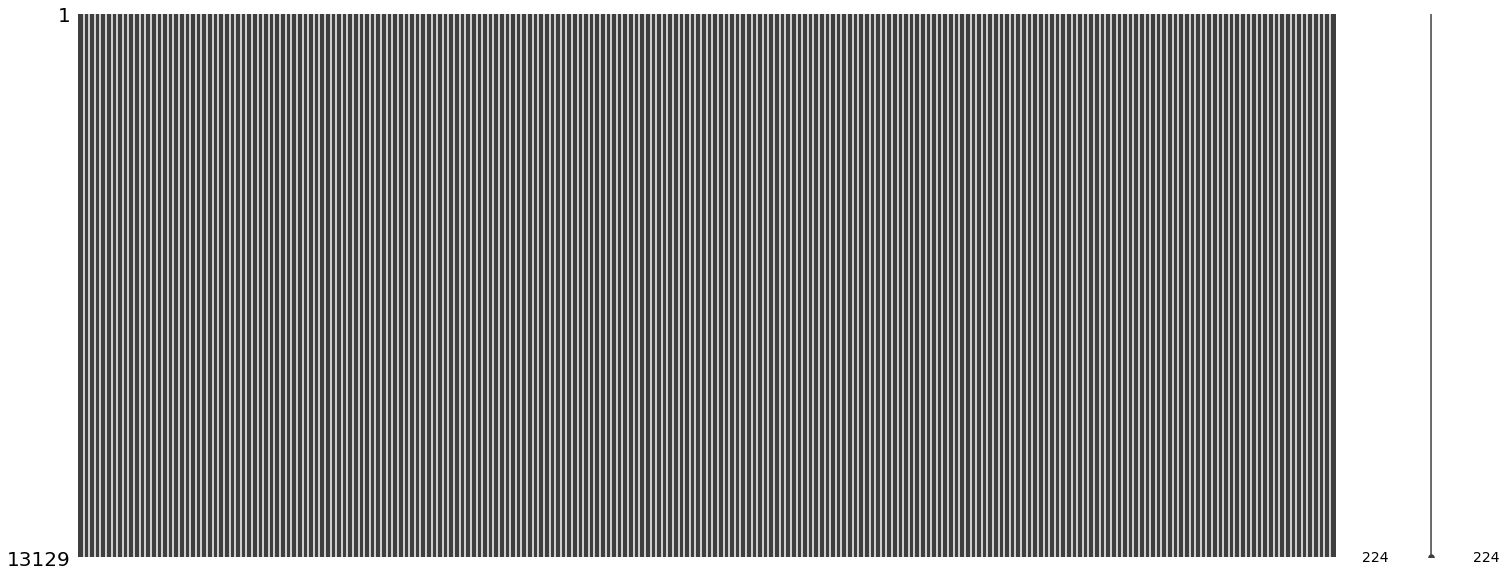

In [137]:
mso.matrix(eco['echonest','temporal_features'])

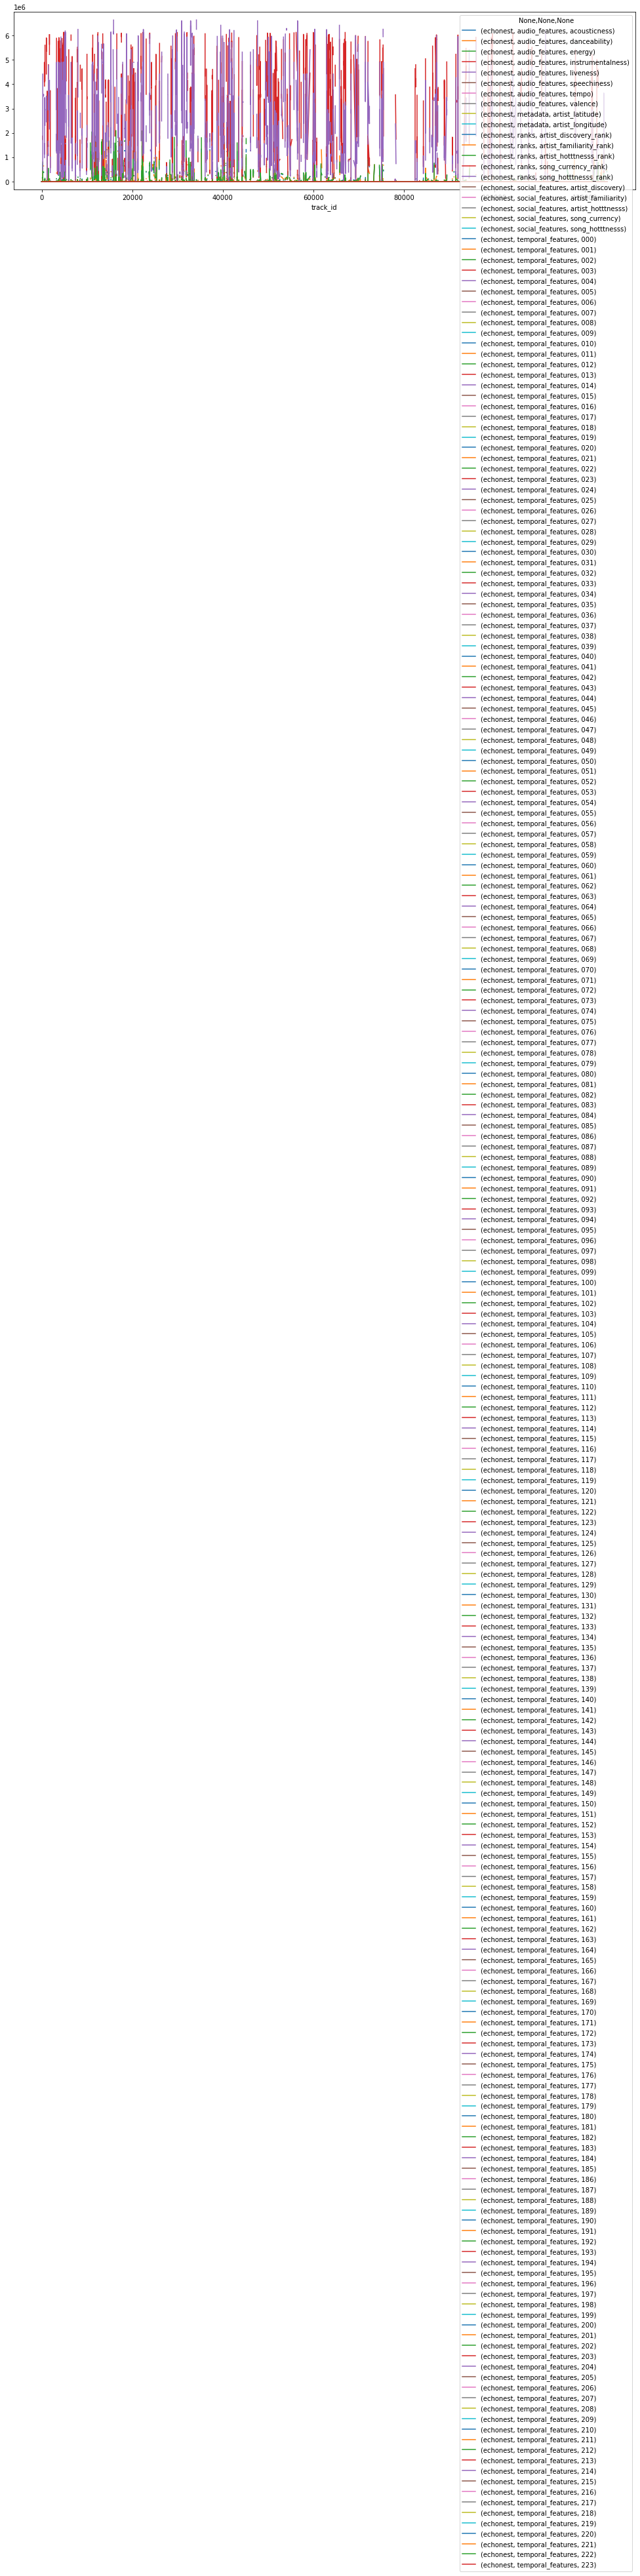

In [138]:
eco.plot()

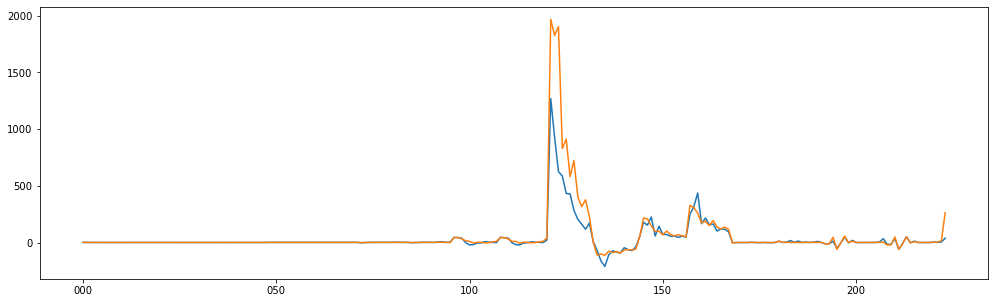

In [139]:

x = eco.loc[139, ('echonest', 'temporal_features')]
y = eco.loc[2, ('echonest', 'temporal_features')]

x.plot()
y.plot()
plt.show()


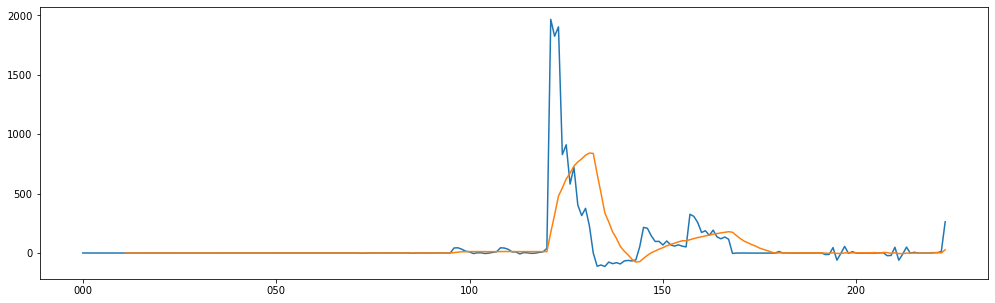

In [155]:
y.plot()
plt.plot(y.rolling(window=12).mean())
plt.show()

In [141]:
eco['echonest','temporal_features'].columns

Index(['000', '001', '002', '003', '004', '005', '006', '007', '008', '009',
       ...
       '214', '215', '216', '217', '218', '219', '220', '221', '222', '223'],
      dtype='object', length=224)

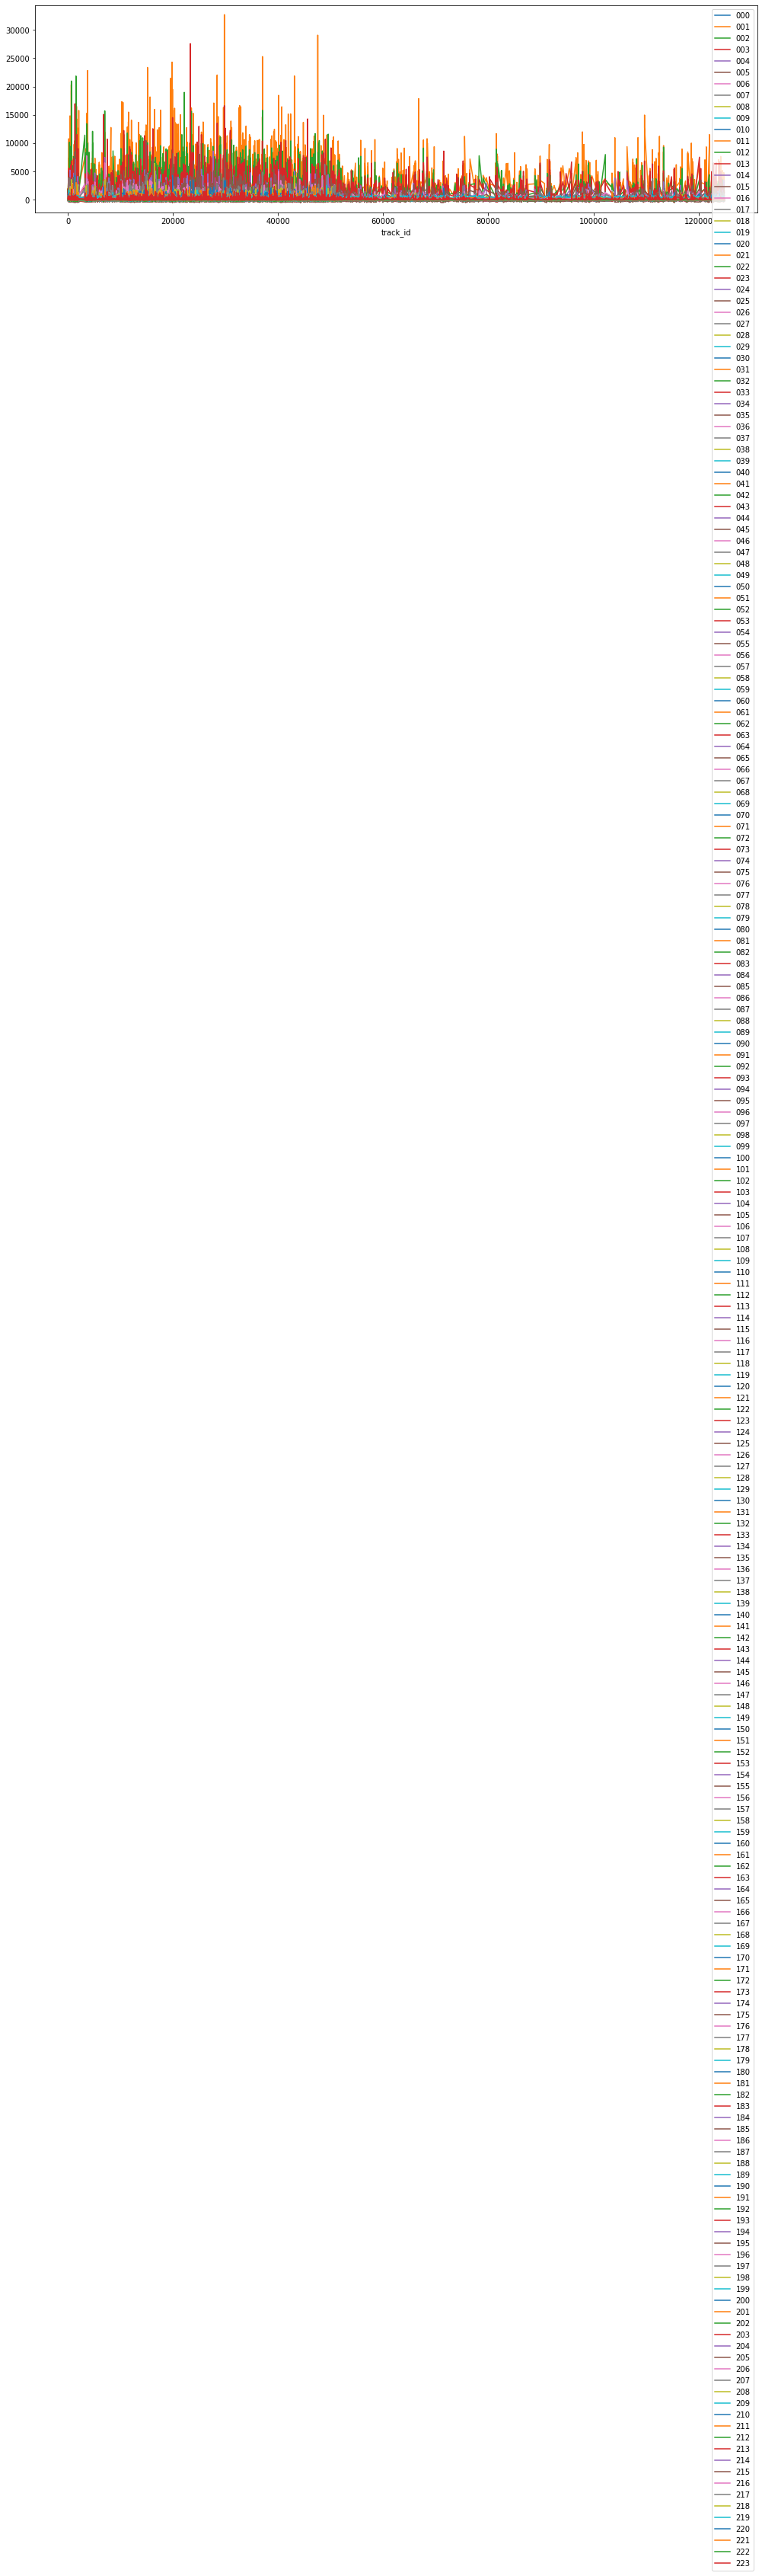

In [142]:
eco['echonest', 'temporal_features'].plot()

In [145]:
np.squeeze(eco['echonest', 'temporal_features']).shape

(13129, 224)

# Eco- K-Means

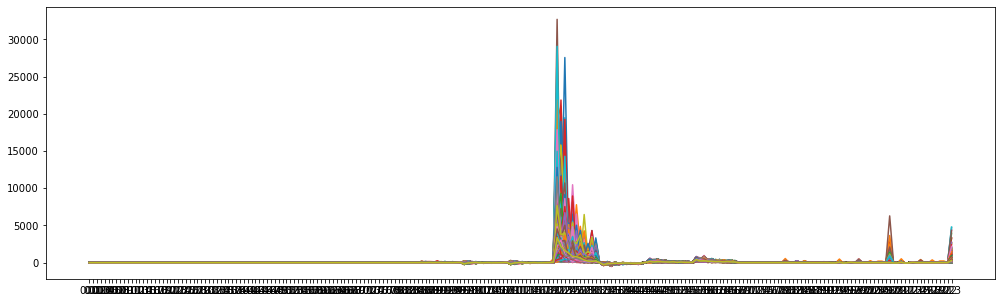

In [151]:
plt.plot(np.squeeze(eco['echonest', 'temporal_features']).T)
plt.show()

In [156]:

km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=5, random_state=0)
km.fit(eco['echonest', 'temporal_features'])

TimeSeriesKMeans(max_iter=5, random_state=0)

In [157]:
km.cluster_centers_.shape


(3, 224, 1)

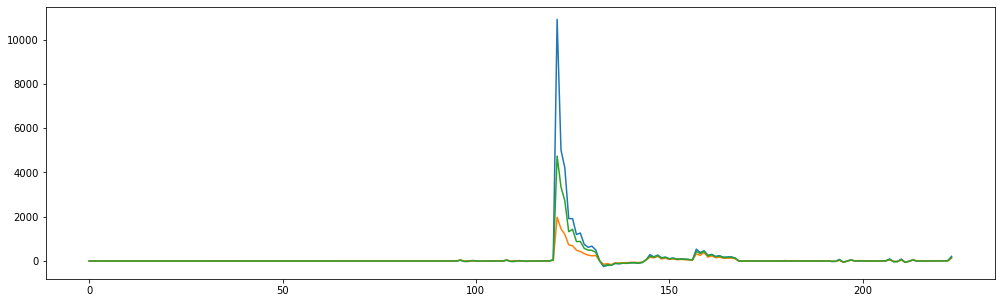

In [158]:
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.show()

In [ ]:
km_dtw = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=5, random_state=0)
km_dtw.fit(eco['echonest', 'temporal_features'])
km_dtw.cluster_centers_.shape
plt.plot(np.squeeze(km_dtw.cluster_centers_).T)
plt.show()